# 04 Pre-processing and Training Data<a id='04_Pre-processing and Training Data'></a>




## 4.1 Dummy or Indicator Features for Categorical Variables


### 4.1 Load the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LogisticRegression
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm 

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### 4.1.2 Load and Split the data

### 4.1.2a MZVAV_1_oaplus2

In [2]:
df1 = pd.read_csv('../data/df1.csv', index_col = False)
df1 = df1.drop(columns = ["Unnamed: 0"])
df1.head(3)

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,68.00,55.04,35.60,68.00,75.20,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1
1,67.99,55.04,35.60,66.71,75.20,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1
2,67.99,55.04,-2.33,66.71,74.45,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1


In [3]:
# Make a variable called 'features', and a list containing the strings of every column except "Fault Detection Ground Truth"
features_df1 = [column for column in df1.columns if column != 'Fault Detection Ground Truth']

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X_df1 = df1[features_df1] 

# Make a dependent variable called y, and assign it: df1['Fault Detection Ground Truth']
y_df1 = df1['Fault Detection Ground Truth'] 

In [39]:
corr = df1.corr()
corr.style.background_gradient(cmap="coolwarm")

C:\Users\weiru\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\weiru\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
AHU: Supply Air Temperature,1.000000,nan,0.216567,0.430233,0.125461,0.236617,0.236617,-0.161726,-0.001124,0.048553,-0.015610,nan,0.241884,-0.044955,0.031571
AHU: Supply Air Temperature Set Point,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AHU: Outdoor Air Temperature,0.216567,nan,1.000000,0.651269,0.697441,-0.151451,-0.151451,0.022777,-0.001009,0.301683,-0.020914,nan,-0.259524,0.147097,0.091147
AHU: Mixed Air Temperature,0.430233,nan,0.651269,1.000000,0.510412,-0.067028,-0.067028,-0.577908,-0.004905,0.215018,-0.046288,nan,-0.053148,-0.222230,0.044586
AHU: Return Air Temperature,0.125461,nan,0.697441,0.510412,1.000000,-0.240479,-0.240479,0.061260,-0.000512,0.223071,-0.014214,nan,-0.415269,0.290516,0.014281
AHU: Supply Air Fan Speed Control Signal,0.236617,nan,-0.151451,-0.067028,-0.240479,1.000000,1.000000,0.311472,0.001626,0.249552,0.003982,nan,0.909507,0.498778,-0.000689
AHU: Return Air Fan Speed Control Signal,0.236617,nan,-0.151451,-0.067028,-0.240479,1.000000,1.000000,0.311472,0.001626,0.249552,0.003982,nan,0.909507,0.498778,-0.000689
AHU: Outdoor Air Damper Control Signal,-0.161726,nan,0.022777,-0.577908,0.061260,0.311472,0.311472,1.000000,0.004973,0.200078,0.013665,nan,0.111382,0.654414,-0.075463
AHU: Return Air Damper Control Signal,-0.001124,nan,-0.001009,-0.004905,-0.000512,0.001626,0.001626,0.004973,1.000000,-0.001432,-0.000032,nan,0.000626,0.003676,0.003586
AHU: Cooling Coil Valve Control Signal,0.048553,nan,0.301683,0.215018,0.223071,0.249552,0.249552,0.200078,-0.001432,1.000000,-0.003507,nan,0.113591,0.282206,-0.034513


In [5]:
# One-hot encode all features in X.
X_df1 = pd.get_dummies(X_df1) 

In [6]:
# Call train_test_split on X_df1, y_df1. Make the test_size = 0.25, and random_state = 246
X_df1_train, X_df1_test, y_df1_train, y_df1_test = train_test_split(X_df1, y_df1, test_size=0.25, random_state=246) 

In [7]:
X_df1_train = X_df1_train.to_numpy()
y_df1_train = y_df1_train.to_numpy()

### 4.1.3b MZVAV_2_1_hcvleak

In [8]:
df2 = pd.read_csv('../data/df2.csv')
df2 = df2.drop(columns = ["Unnamed: 0"])
df2.head(3)

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,75.92,55,80.61,73.54,73.86,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
1,75.71,55,80.68,73.54,73.86,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
2,75.71,55,80.66,73.54,73.86,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1


In [9]:
# Make a variable called 'features', and a list containing the strings of every column except "Fault Detection Ground Truth"
features_df2 = [column for column in df2.columns if column != 'Fault Detection Ground Truth']

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X_df2 = df2[features_df2] 

# Make a dependent variable called y, and assign it: df1['Fault Detection Ground Truth']
y_df2 = df2['Fault Detection Ground Truth'] 

In [10]:
# One-hot encode all features in X.
X_df2 = pd.get_dummies(X_df2) 

In [11]:
# Call train_test_split on X_df2, y_df2. Make the test_size = 0.25, and random_state = 246
X_df2_train, X_df2_test, y_df2_train, y_df2_test = train_test_split(X_df2, y_df2, test_size=0.25, random_state=246) 

### 4.1.3c MZVAV_2_2_oadamperstuck (the same as 4.1.3a)

### 4.1.3d MZVAV_2_2_ccvstuck (the same as 4.1.3a)

### 4.1.3e SZCAV_ccvleak (the same as 4.1.3a)

### 4.1.3f SZVAV_hcvleak (the same as 4.1.3a)

## 4.2 Standardize the magnitude of numeric features

### 4.2.1a MZVAV_1_oaplus2

In [12]:
# Making a Scaler object 
scaler = preprocessing.MinMaxScaler((-1,1)) 

In [13]:
# Fitting data to the scaler object
X_df1_train = scaler.fit_transform(X_df1_train)
X_df1_test = scaler.transform(X_df1_test)
X_df1_train = pd.DataFrame(X_df1_train, columns=features_df1) 

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


### 4.2.1b MZVAV_2_1_hcvleak

### 4.2.1c MZVAV_2_2_oadamperstuck

### 4.2.1d MZVAV_2_2_ccvstuck

### 4.2.1e SZCAV_ccvleak

### 4.2.1f SZVAV_hcvleak

# 05 Machine Learning models<a id='05_Machine Learning models'></a>

This is a classification problem, in supervised learning. Here we have used the following classification models. 

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

Classification/ Confusion Matrix: This matrix summarizes the correct and incorrect classifications that a classifier produced for a certain dataset. Rows and columns of the classification matrix correspond to the true and predicted classes respectively. The two diagonal cells (upper left, lower right) give the number of correct classifications, where the predicted class coincides with the actual class of the observation. The off diagonal cells gives the count of the misclassification. The classification matrix gives estimates of the true classification and misclassification rates.

## 5.1 Logistic Regression









In [14]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(solver = 'newton-cg', max_iter = 1000, penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_df1_train,y_df1_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_df1_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_df1_test,y_pred_lr)
    j += 1
    
table  

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

,C_parameter,Accuracy
0,0.001,0.553858
1,0.010,0.570525
2,0.100,0.580247
3,1.000,0.573405
4,10.000,0.573714
5,100.000,0.573663


In [15]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_df1_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_df1_test,y_df1_test)

print(Accuracy_lr)

[[4717 4920]
 [3368 6435]]
0.5736625514403292


C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(Logreg,X_df1_test,y_df1_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_df1_train,y_df1_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.64931938 0.65114531 0.64892334 0.62956161 0.64227448]
Mean cross validation test score: 0.6442448230725032
Mean cross validation train score: 0.652652576426016
Standard deviation in cv test scores: 0.00793391853421793


## 5.2 K-Nearest Neighbor (KNN)











Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_df1_train,y_df1_train)

# Predict using model:

y_predict_knn=knn.predict(X_df1_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_df1_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_df1_test,y_df1_test)

print(Accuracy_knn)
#knn_disp= plot_roc_curve(knn,X_test,y_test)

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[9503  134]
 [ 160 9643]]


C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9848765432098765


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(knn,X_df1_test,y_df1_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_df1_train,y_df1_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.99260416 0.99167769 0.99292297 0.993041   0.99086944]
Mean cross validation test score: 0.992223052094934
Mean cross validation train score: 0.9982373870702104
Standard deviation in cv scores: 0.000828716954052753


## 5.3 SVM











In [19]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_df1_train, y_df1_train)

# Predict using model:

y_predict_svm=svm.predict(X_df1_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_df1_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_df1_test,y_df1_test)
print(Accuracy_svm)

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[4724 4913]
 [3322 6481]]


C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.5763888888888888


In [20]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_df1_test,y_df1_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_df1_train,y_df1_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.63767545 0.64047204 0.6426529  0.62268703 0.63301928]
Mean cross validation test score: 0.6353013403894212
Mean cross validation train score: 0.6464524255435664
Standard deviation in cv scores: 0.007081621338098255


## 5.4 Random Forest











In [21]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_df1_train, y_df1_train)

#Predict using the model:

y_predict_rf = rf.predict(X_df1_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_df1_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_df1_test,y_df1_test)
print(Accuracy_rf)

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[9547   90]
 [ 128 9675]]


C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9887860082304527


In [22]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(rf,X_df1_test,y_df1_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_df1_train,y_df1_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.99629176 0.99502035 0.9967977  0.99564153 0.99574936]
Mean cross validation test score: 0.9959001402650293
Mean cross validation train score: 0.9990629616608299
Standard deviation in cv scores: 0.0006037588558253187


## 5.5 Naive Bayes










In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_df1_train,y_df1_train)

#Predict using the model:

y_predict_nb=nb.predict(X_df1_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_df1_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_df1_test,y_df1_test)
print(Accuracy_nb)

[[9636    1]
 [9803    0]]
0.495679012345679


C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(nb,X_df1_test,y_df1_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_df1_train,y_df1_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.57683996 0.56281861 0.57924415 0.56066467 0.56503637]
Mean cross validation test score: 0.5689207523494331
Mean cross validation train score: 0.5677033234677669
Standard deviation in cv scores: 0.007612802054648473


## 5.6 Gradient Boost

In [25]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_df1_train, y_df1_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_df1_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_df1_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_df1_test,y_df1_test)
print(Accuracy_gbc)

[[9449  188]
 [ 126 9677]]
0.9838477366255144


C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_df1_test,y_df1_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_df1_train,y_df1_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.99684827 0.99693639 0.99608624 0.99588287 0.99603794]
Mean cross validation test score: 0.9963583444953453
Mean cross validation train score: 0.9985555870601521
Standard deviation in cv scores: 0.0004420276308800845


# 06 Comparison of the models<a id='06_Comparison of the models'></a>

We applied different ML models above and evaluated their performances in terms of ROC-AUC score for both the training and test data. Here we have tabulated the scores and plotted them.

Clearly, the Gradient Boost, and the Random Forest are the two best performing models. Both of the models are ensembled, based on decision trees.

So, we will perform a grid search/ hyperparameter tuning for those two ML models.

In [27]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Naive Bayes', 'Gradient Boost']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_nb_test,cv_scores_gbc_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_nb_train,cv_scores_gbc_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_nb,Accuracy_gbc]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.573663
1                  KNN              0.984877
2                  SVM              0.576389
3        Random Forest              0.988786
4          Naive Bayes              0.495679
5       Gradient Boost              0.983848


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.652653,0.644245
1,KNN,0.998237,0.992223
2,SVM,0.646452,0.635301
3,Random Forest,0.999063,0.995900
4,Naive Bayes,0.567703,0.568921
5,Gradient Boost,0.998556,0.996358


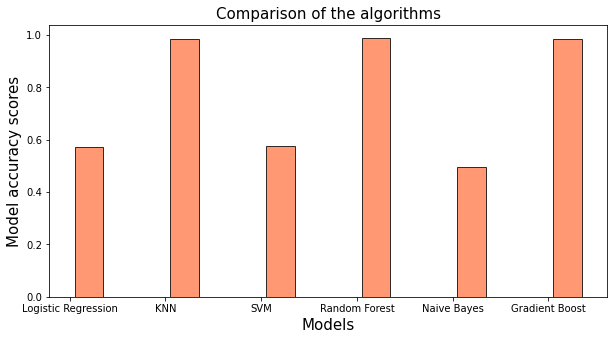

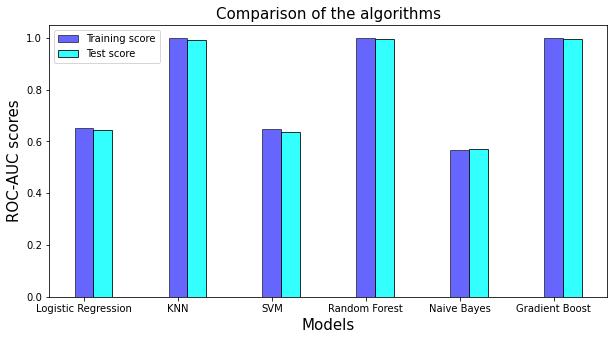

In [28]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

# 07 Applying Grid Search CV for Hyperparameter Tuning<a id='07_Applying Grid Search CV for Hyperparameter Tuning'></a>

## 7.1 Parameter Tuning for Random Forest

In [29]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X_df1_train, y_df1_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)
0.9858882030178328


### 7.1.1 Fitting the Random forest model with the optimal hyperparameters

In [30]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
rf.fit(X_df1_train, y_df1_train)
y_predictions_rf = rf.predict(X_df1_test)
acc = accuracy_score(y_df1_test, y_predictions_rf)
cv = cross_val_score(rf, X_df1_test, y_df1_test,scoring='roc_auc').mean()
print(acc)
print(cv)

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9898662551440329
0.9962971647019249


                                          Features  Importance scores
0                      AHU: Supply Air Temperature           0.000000
1            AHU: Supply Air Temperature Set Point           0.000000
2                     AHU: Outdoor Air Temperature           0.000011
3                       AHU: Mixed Air Temperature           0.000018
4                      AHU: Return Air Temperature           0.003160
5         AHU: Supply Air Fan Speed Control Signal           0.007706
6         AHU: Return Air Fan Speed Control Signal           0.011943
7           AHU: Outdoor Air Damper Control Signal           0.011974
8            AHU: Return Air Damper Control Signal           0.033014
9           AHU: Cooling Coil Valve Control Signal           0.049624
10          AHU: Heating Coil Valve Control Signal           0.109897
11  AHU: Supply Air Duct Static Pressure Set Point           0.127973
12            AHU: Supply Air Duct Static Pressure           0.166783
13                  

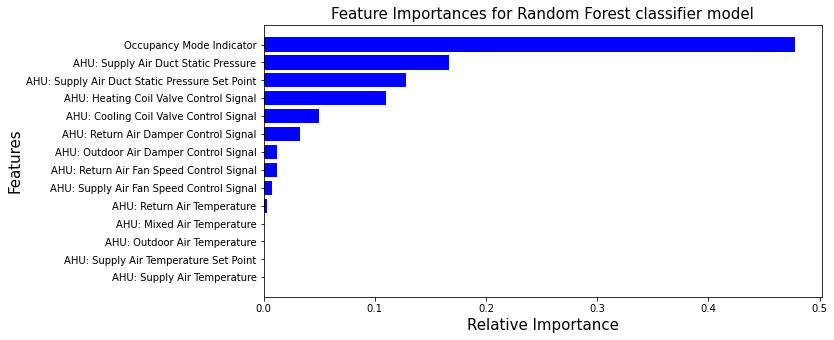

In [31]:
#Feature importances:

features = X_df1
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X_df1,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("OAPlus2.png")
plt.show()
#len(importances)

### 7.1.2 ROC-AUC Score and the ROC curve

In [32]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_df1_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_df1_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC-AUC Score: 0.9994147389047265


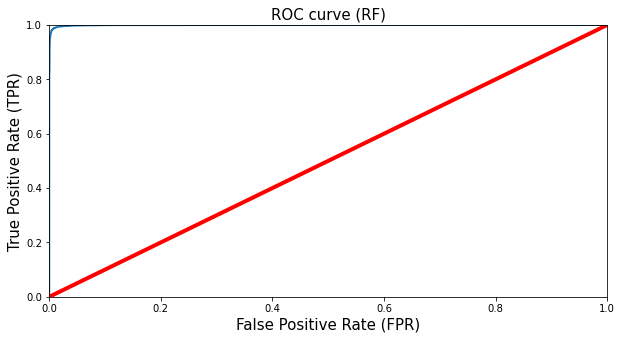

In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_df1_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

## 7.2 Parameter Tuning for Gradient Boost

In [34]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_df1_train,y_df1_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)
0.9799897119341564


### 7.2.1 Fitting the Gradient Boost model with the optimal hyperparameters

In [35]:
GB= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, 
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
GB.fit(X_df1_train, y_df1_train)
y_predictions_GB = GB.predict(X_df1_test)
acc_GB = accuracy_score(y_df1_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_df1_test, y_df1_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.9872427983539095
0.9939101999143695


                                          Features  Importance scores
0                      AHU: Supply Air Temperature           0.000000
1            AHU: Supply Air Temperature Set Point           0.000000
2                     AHU: Outdoor Air Temperature           0.000000
3                       AHU: Mixed Air Temperature           0.000000
4                      AHU: Return Air Temperature           0.007761
5         AHU: Supply Air Fan Speed Control Signal           0.009443
6         AHU: Return Air Fan Speed Control Signal           0.014453
7           AHU: Outdoor Air Damper Control Signal           0.019082
8            AHU: Return Air Damper Control Signal           0.034041
9           AHU: Cooling Coil Valve Control Signal           0.079935
10          AHU: Heating Coil Valve Control Signal           0.082543
11  AHU: Supply Air Duct Static Pressure Set Point           0.117467
12            AHU: Supply Air Duct Static Pressure           0.188852
13                  

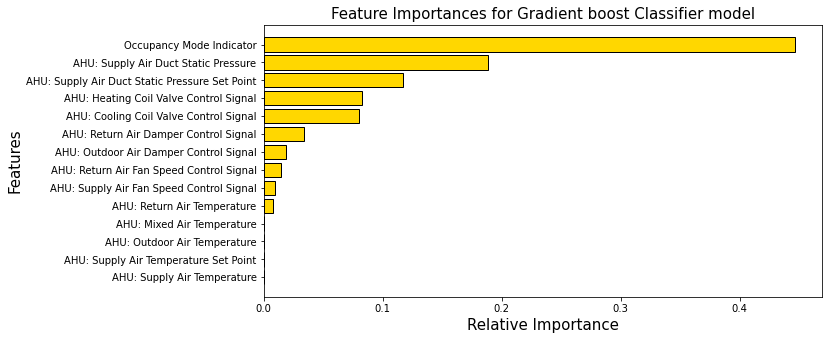

In [36]:
features = X_df1
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X_df1,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient boost Classifier model',fontsize=15)
plt.savefig("29.png")
plt.show()
#len(importances)

### 7.2.2 ROC-AUC Score and the ROC curve

In [37]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = GB.predict_proba(X_df1_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_df1_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9991624882553218


C:\Users\weiru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


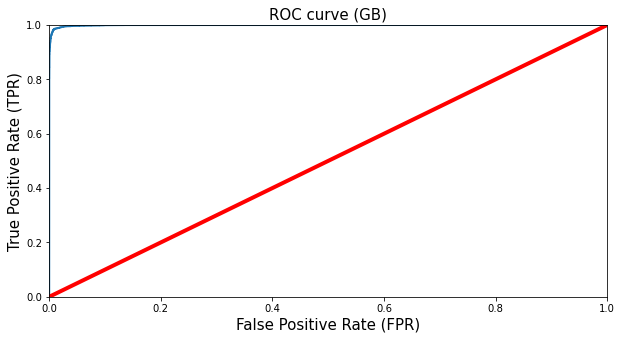

In [38]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_df1_test, y_scores_gb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("31.png")
plt.show()

# 08 Conclusion

In order to predict the fault detect, here we have considered a bunch of (13) features, either directly from the dataset or engineered/derived from the data. Interestingly, the engineeered features are the most important ones in terms of relative importances.

This is a classification problem. Here we have used the following classification models:

- Logistic Regression
- K-Nearest Neighbor (KNN)
- Support vector machine (SVM)
- Random Forest
- Naive Bayes
- Gradient Boost

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

We have evaluated each model in terms of model accuracy score, and 'ROC-AUC' score for both the training and test data, and plotted them. The two best performing models are the Random forest and the Gradient boost. Both are the ensemble model, based on decision trees.

Next, we have carried out the grid search CV for the hyperparameter tuning for both the models separately. This step was the most time consuming one in terms of computation. (The RF model took much longer time). With the result of the optimized hyperparameters, we have again fitted the two models, and got the predictions separately.

We have evaluated the ROC-AUC scores with the optimized hyperparameters. Clearly, the model performance improved with the optimized parameters. The final ROC-AUC scores fro both RF and the GB are 0.99941 and 0.99916.